In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
real = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

In [3]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [4]:
real['Real'] = 1
fake['Real'] = 0

In [5]:
news = real.append(fake)

In [6]:
news['text length'] = news['text'].apply(len)

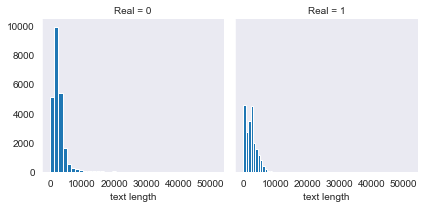

In [7]:
sns.set_style('dark')
g = sns.FacetGrid(news,col='Real')
g.map(plt.hist,'text length',bins=40)

## Using a pipeline

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [9]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [10]:
X = news['text']
y = news['Real']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
pipeline = Pipeline([
    ('bow', CountVectorizer(text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ MultinomialNB classifier
])

In [12]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input=<function text_process at 0x000001791DCBB558>,
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1),
                                 preprocessor=None, stop_words=None,
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],

In [13]:
prediction = pipeline.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[6646  332]
 [ 540 5952]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6978
           1       0.95      0.92      0.93      6492

    accuracy                           0.94     13470
   macro avg       0.94      0.93      0.94     13470
weighted avg       0.94      0.94      0.94     13470



## Comparing with SVC

In [15]:
pipeline = Pipeline([
    ('bow', CountVectorizer(text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVC classifier
])

In [16]:
pipeline.fit(X_train,y_train)
prediction = pipeline.predict(X_test)

In [17]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[6927   51]
 [  48 6444]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6978
           1       0.99      0.99      0.99      6492

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

